# Goal
Create a really highly autocorrelated plot. Do one in pystan and do one in pymc3!

In [1]:
import numpy as np
import pymc3 as pm
import pystan
import arviz as az

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c2454b780>],
      dtype=object)

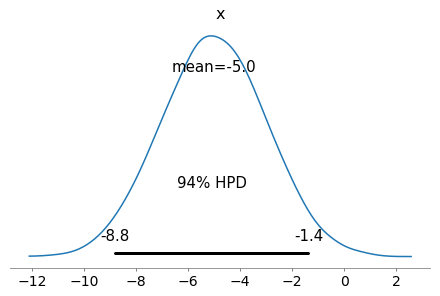

In [2]:
# Generate Gaussian
obs = np.random.normal(loc=-5, scale=2, size=10000)
obs
az.plot_posterior(obs)

Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
INFO:pymc3:Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd, mu]
INFO:pymc3:NUTS: [sd, mu]
Sampling 2 chains: 100%|██████████| 2000/2000 [00:02<00:00, 808.94draws/s]
The acceptance probability does not match the target. It is 0.8816211977517142, but should be close to 0.8. Try to increase the number of tuning steps.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c274aa898>,
      dtype=object)

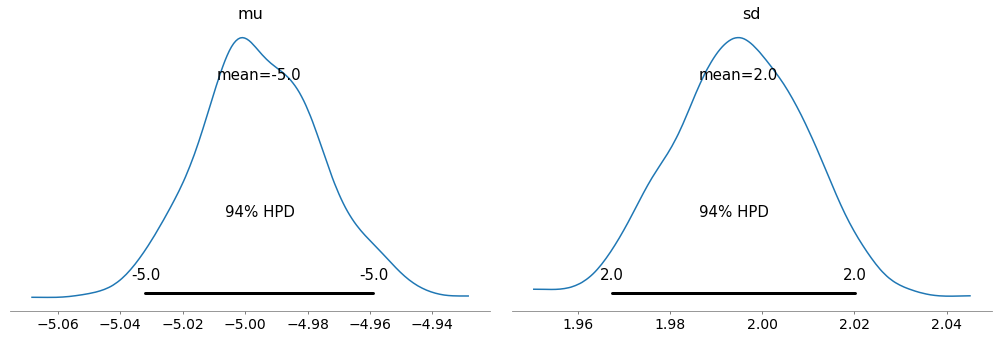

In [3]:
with pm.Model() as model:
    mu = pm.Normal("mu", mu=0, sd=1)
    sd = pm.HalfNormal("sd", sd=1)
    y = pm.Normal("y", mu=mu, sd=sd, observed=obs)
    trace = pm.sample()
    
az.plot_posterior(trace)

Multiprocess sampling (2 chains in 2 jobs)
INFO:pymc3:Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
INFO:pymc3:CompoundStep
>Metropolis: [mu]
INFO:pymc3:>Metropolis: [mu]
>NUTS: [sd]
INFO:pymc3:>NUTS: [sd]
Sampling 2 chains: 100%|██████████| 11000/11000 [00:11<00:00, 947.75draws/s]
There were 1167 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc3:There were 1167 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.923460923573303, but should be close to 0.8. Try to increase the number of tuning steps.
There were 989 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc3:There were 989 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.9376055752271469, but should be close to 0.8. Try to increase the number of tuning steps.
The estimated number of effective samp

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c27358ba8>,
      dtype=object)

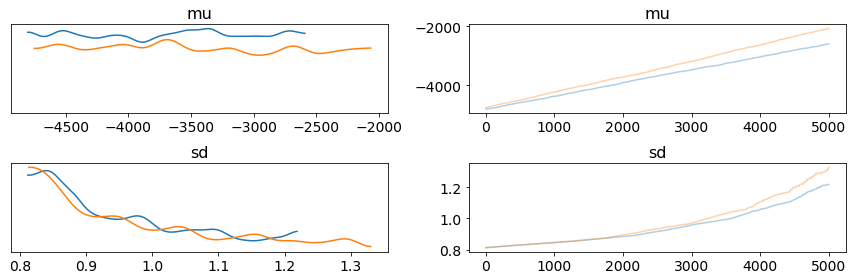

In [4]:
with pm.Model() as model:
    mu = pm.Normal("mu", mu=-5000, sd=1)
    sd = pm.HalfNormal("sd", sd=1)
    y = pm.Normal("y", mu=mu, sd=sd, observed=obs)
    step = pm.Metropolis(vars=[mu])
    trace = pm.sample(5000, step, chains=2)
az.plot_trace(trace)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c270f9da0>,
      dtype=object)

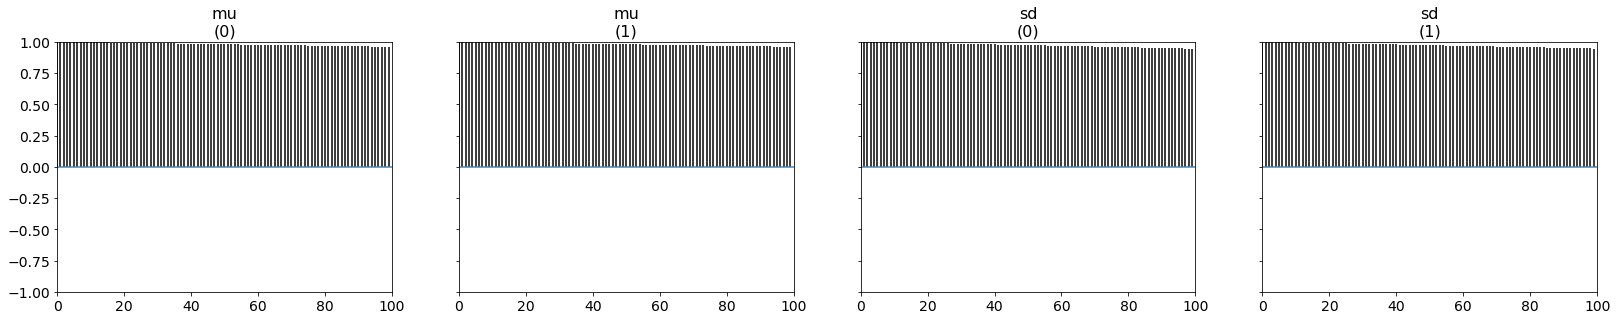

In [5]:
az.plot_autocorr(trace)